# Example of using the prototype tool in "Mission Design Mode"

In [5]:
import os, rcmd, sys, plot_syn
%matplotlib inline
from IPython.core.display import Image, display

In [ ]:
rcmd.run_command('./createdir_example_mba.sh')

In [6]:
cd mba_intro/example_mba/

/home/prs/esa_demo_pre2/mba_intro/example_mba


### Not doing a complete retrieval here, but evaluate through uncertainty propagation how hypothetical observations would constrain control vector components and target variables
- observations itself not needed, only `observational uncertainties` are required

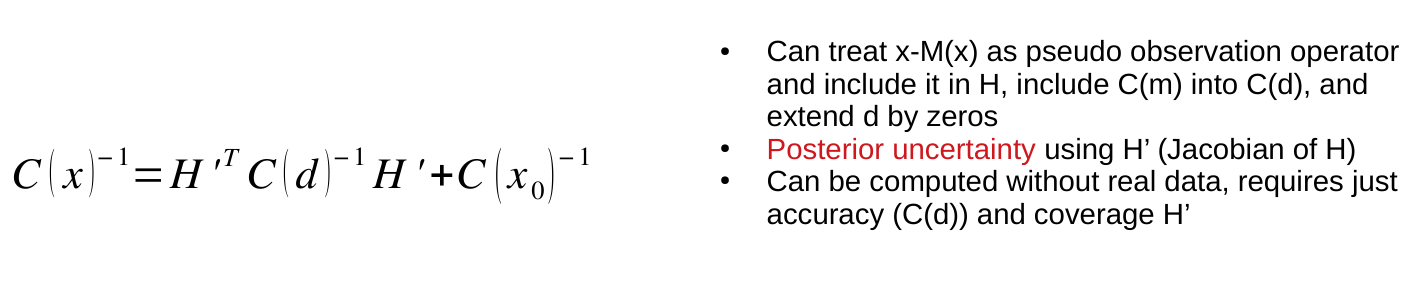

In [4]:
display(Image('../state_uncertainty_scheme.png'))

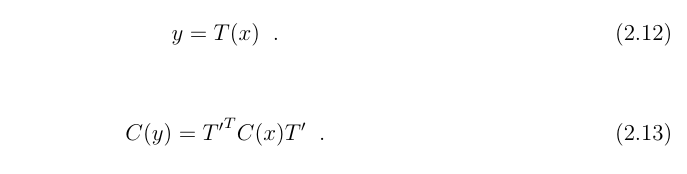

In [8]:
display(Image('../target_unc_propagation.png'))

### Performance metric is the uncertainty reduction:

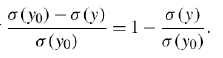

In [27]:
display(Image('../performance_metric.png'))

In [ ]:
cat ../mk.mba.txt

### Synthetic observational uncertainty will be created using a generic prior (suitable for agricultural sites)
- period May to June 2017 (with some extra target times in May)
- based on the generic prior
- BRF uncertainties are determined by assuming 5% relative uncertainty of simulated BRF
- backscatter uncertainties are set to 0.4dB

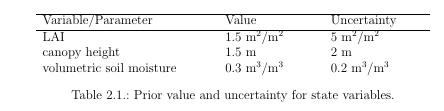

In [9]:
display(Image('../generic_prior.png'))

In [5]:
cat ../cmd.pre_s1s2.txt

bin/rs_pre.py pre_synthetic --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --use_generic_prior --mission_lst S1A S1B S2A S2B


In [28]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --use_generic_prior --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B')

2019-04-03 12:34:25,028 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-03T12:34:25.028121
2019-04-03 12:34:25,028 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic --use_generic_prior --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B
2019-04-03 12:34:25,031 INFO::main:: user selection +++pre_synthetic+++
2019-04-03 12:34:25,031 INFO::pre_synthetic:: 'site.nml' from current working directory will be used.
2019-04-03 12:34:25,031 INFO::pre_synthetic:: START reading namelist ***site.nml***...
2019-04-03 12:34:25,032 INFO::pre_synthetic:: ...reading DONE
2019-04-03 12:34:25,035 INFO::pre_synthetic:: operating for temporal range 2017-05-01T00:00:00 - 2017-07-31T23:59:59 (num_days=91)
2019-04-03 12:34:25,035 INFO::pre_synthetic:: selected mission_lst: ['S1A', 'S1B', 'S2A', 'S2B']
2019-04-03 12:34:25,038 INFO::load_obs_csv:: observation data loaded from file ***/home/prs/esa_demo_pre2/mba_intro/example_mba/inp

0

### Create synthetic observational uncertainty data (S1A/S1B, S2A/S2B)
- in mission benefit analysis mode, only the `uncertainty` of the generated obervational data is of relevance).

In [29]:
rcmd.run_command('make synthetic')

./simulate.x  2>&1 | tee mk.synthetic.log
 INFO::runsim:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  67 npts_s1=  47 npts_s2=   9
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runsim:...done.
 DEBUG::runsim:initf yields:n=203 m=211
 INFO::runsim:calling initx...
 INFO::runsim:...DONE.
 DEBUG::runsim::calling simulate_s1s2 at x ...
  j     x-physical       x-scaled        x-sigma
  1     0.10000000     1.00000000     0.10000000
  2     0.10000000     1.00000000     0.10000000
  3     1.50000000     0.30000000     5.00000000
  4     1.50000000     0.75000000     2.00000000
  5     0.30000000     1.50000000     0.20000000
  6     1.50000000     0.30000000     5.00000000
  7     1.50000000     

0

### Run the uncertainty propagation
- to save time, in this demo, we don’t propagate uncertainty to target variables `FAPAR` and `HH backscatter`.

In [30]:
rcmd.run_command('./runua.x --no_targets')

 INFO::retrieval_read_ctl:read settings from file ***retrctl.nml***...
 INFO::retrieval_read_ctl:...reading done.
 INFO::use_prior_term: T
 INFO::use_state_term: T
 INFO::gradient_tolerance: .10000E-04
 INFO::prior_pert: .25000E+00
 INFO::runua:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  67 npts_s1=  47 npts_s2=   9
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runua:...done.
 INFO::runua:calling initx...
 INFO::runua:...done.
 INFO::state_model_set:will be setting-up simple state-model of type "mx(i+1)=a(i+1)*x(i) + b(i+1)"
 INFO::state_model_set:reading model configuration from file ***retrmodel.nc***...
 INFO::state_model_set:...reading done.
 INFO::getobs:initial loading of observation

0

In [31]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_s1s2')

if [ "xresdir_mba_s1s2" != "x" ]; then \
          mkdir -p resdir_mba_s1s2; \
          rm -f resdir_mba_s1s2/*; \
          for f in `echo mk.mba_pre.log mk.mba_synthetic.log retrconfig.nc retrprior.nc retrmodel.nc retrctl.nml site.nml retrctlvecbounds.nml x.b sx.b fort.[0-9] fort.[0-9][0-9] sensimul_s?.nc sensimul_s?.b sensimul.b x.b sx.b iterate.dat Cx.b sigma.dat xrunua.log sigma.dat mk.pre.log iterate.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_post.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.retrieval.log sigma.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_poast.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.mba.log obs_s1.nc obs_s2.nc simulation.nc mk.synthetic.log`; \
          do \
    if [ -f ${f} ]; \
            then \
              cp -a ${f} resdir_mba_s1s2; \
            fi; \
          done; \
        fi;


0

In [ ]:
ls -ralt resdir_mba_s1s2

### Repeat this experiment without using the dynamical model:

In [ ]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --no_use_model --use_generic_prior --time_start 20170501 --time_end 20170731 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B')

In [ ]:
cat retrctl.nml

In [ ]:
rcmd.run_command('./runua.x --no_targets')

In [ ]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_s1s2-nomod')

### Compare performance for cases S1+S2 with and without using the dynamical model (LAI):

In [ ]:
display(Image('../lai_uncred_20170501-20170731_s1s2_s1s2-nomod.png'))

### Compare performance for cases S1+S2 with and without using the dynamical model (soil moisture):

In [ ]:
display(Image('../sm_uncred_20170501-20170731_s1s2_s1s2-nomod.png'))

### As final exercise we evaluate the performance in case only S1A/S1B are available:

In [32]:
rcmd.run_command('bin/rs_pre.py pre_synthetic --mission_lst S1A S1B --time_start 20170501 --time_end 20170731 --target_schedule ../target_schedule_2017-plus-S2A-S2B.txt --use_generic_prior ')

2019-04-03 12:38:19,495 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-03T12:38:19.495625
2019-04-03 12:38:19,495 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic --mission_lst S1A S1B --time_start 20170501 --time_end 20170731 --target_schedule ../target_schedule_2017-plus-S2A-S2B.txt --use_generic_prior
2019-04-03 12:38:19,498 INFO::main:: user selection +++pre_synthetic+++
2019-04-03 12:38:19,498 INFO::pre_synthetic:: 'site.nml' from current working directory will be used.
2019-04-03 12:38:19,498 INFO::pre_synthetic:: START reading namelist ***site.nml***...
2019-04-03 12:38:19,499 INFO::pre_synthetic:: ...reading DONE
2019-04-03 12:38:19,501 INFO::pre_synthetic:: operating for temporal range 2017-05-01T00:00:00 - 2017-07-31T23:59:59 (num_days=91)
2019-04-03 12:38:19,501 INFO::pre_synthetic:: selected mission_lst: ['S1A', 'S1B']
2019-04-03 12:38:19,504 INFO::load_obs_csv:: observation data loaded from file ***/home/prs/esa_demo_pre2/mba_intro/example_mba/input/mni_s1_50

0

In [33]:
rcmd.run_command('make synthetic')

./simulate.x  2>&1 | tee mk.synthetic.log
 INFO::runsim:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  67 npts_s1=  47 npts_s2=   0
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runsim:...done.
 DEBUG::runsim:initf yields:n=203 m= 94
 INFO::runsim:calling initx...
 INFO::runsim:...DONE.
 DEBUG::runsim::calling simulate_s1s2 at x ...
  j     x-physical       x-scaled        x-sigma
  1     0.10000000     1.00000000     0.10000000
  2     0.10000000     1.00000000     0.10000000
  3     1.50000000     0.30000000     5.00000000
  4     1.50000000     0.75000000     2.00000000
  5     0.30000000     1.50000000     0.20000000
  6     1.50000000     0.30000000     5.00000000
  7     1.50000000     

0

In [34]:
rcmd.run_command('./runua.x --no_targets')

 INFO::retrieval_read_ctl:read settings from file ***retrctl.nml***...
 INFO::retrieval_read_ctl:...reading done.
 INFO::use_prior_term: T
 INFO::use_state_term: T
 INFO::gradient_tolerance: .10000E-04
 INFO::prior_pert: .25000E+00
 INFO::runua:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  67 npts_s1=  47 npts_s2=   0
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runua:...done.
 INFO::runua:calling initx...
 INFO::runua:...done.
 INFO::state_model_set:will be setting-up simple state-model of type "mx(i+1)=a(i+1)*x(i) + b(i+1)"
 INFO::state_model_set:reading model configuration from file ***retrmodel.nc***...
 INFO::state_model_set:...reading done.
 INFO::getobs:initial loading of observation

0

In [35]:
rcmd.run_command('make save_exp SAVDIR=resdir_mba_only-s1')

if [ "xresdir_mba_only-s1" != "x" ]; then \
          mkdir -p resdir_mba_only-s1; \
          rm -f resdir_mba_only-s1/*; \
          for f in `echo mk.mba_pre.log mk.mba_synthetic.log retrconfig.nc retrprior.nc retrmodel.nc retrctl.nml site.nml retrctlvecbounds.nml x.b sx.b fort.[0-9] fort.[0-9][0-9] sensimul_s?.nc sensimul_s?.b sensimul.b x.b sx.b iterate.dat Cx.b sigma.dat xrunua.log sigma.dat mk.pre.log iterate.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_post.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.retrieval.log sigma.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_poast.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.mba.log obs_s1.nc obs_s2.nc simulation.nc mk.synthetic.log`; \
          do \
    if [ -f ${f} ]; \
            then \
              cp -a ${f} resdir_mba_only-s1; \
            fi; \
          done; \
        fi;


0

#### Compare performance for cases S1+S2 and only-S1 (LAI):

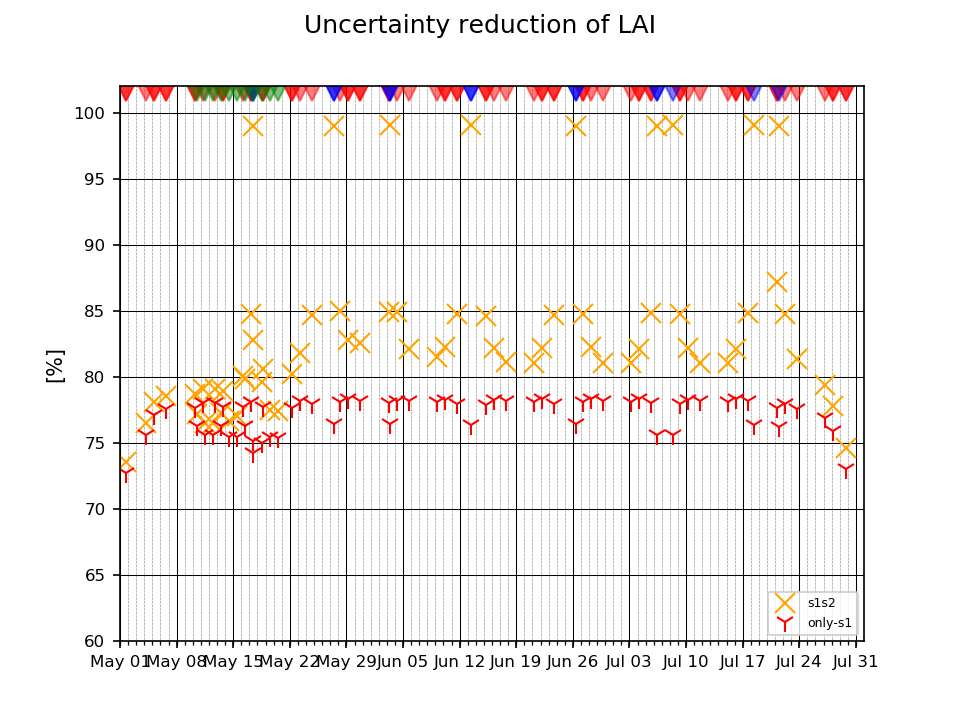

In [36]:
display(Image('../lai_uncred_20170501-20170731_s1s2_only-s1.png'))

#### Compare performance for cases S1+S2 and only-S1 (soil moisture):

In [ ]:
display(Image('../sm_uncred_20170501-20170731_s1s2_only-s1.png'))